<a href="https://colab.research.google.com/github/cbermudez13/eel4815_final_coding_assignment/blob/main/group_1_problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the second example given in the lecture notes. $h_\theta(x) = Wx$

In [ ]:
"""
Problem: Build a binary linear classifier by which the weights are updated using gradient descent. 

Generate a simple dataset D with M=2 labels (with indicies k={1,2}). The data belonging to class 0 (1) is from the Gaussian PDF with mean 0 (1) and variance 1 (1). 
For each datapoint, use number of features F with indicies i={1,2,...F}. Generate N data points. We use n={1,2,...,N} to index the points.  
Generate the corresponding taregt labels using one-hot encoding. We use vector t_n \in {0,1}^M , for n={1,2,...,N}.  

"""

'\nProblem: Build a binary linear classifier by which the weights are updated using gradient descent. \n\nGenerate a simple dataset D with M=2 labels (with indicies k={1,2}). The data belonging to class 0 (1) is from the Gaussian PDF with mean 0 (1) and variance 1 (1). \nFor each datapoint, use number of features F with indicies i={1,2,...F}. Generate N data points. We use n={1,2,...,N} to index the points.  \nGenerate the corresponding taregt labels using one-hot encoding. We use vector t_n \\in {0,1}^M , for n={1,2,...,N}.  \n\n'

In [ ]:
import numpy as np
np.random.seed(seed=5)
############ Generate simple dataset with M=2
number_of_classes_M = 2
number_of_features_F = 5
number_of_points_N   = 1000
data = []
for index in range(number_of_points_N):
    random_choice_for_mean = np.random.choice([0,1])
    tru_lbl = random_choice_for_mean

    if tru_lbl == 0:
        one_hot_rep = [1,0]
        mean = 0
    if tru_lbl == 1:
        one_hot_rep = [0,1]
        mean = 0.1

    mean = random_choice_for_mean

    data.append((np.random.normal(loc=mean, scale=1, size=(number_of_features_F)), one_hot_rep))

In [ ]:
############ Generate the intial weights matrix (size M \times F)
weights = np.random.uniform(low=-1, high=1, size=(number_of_classes_M, number_of_features_F))

In [ ]:
############ Obtain the error function w.r.t. all data points.
def errof_wrt_all_datapoints(data, weights):

    error_fun_wrt_weights_per_point = []

    for data_point_index in range(number_of_points_N):

        NW_output = np.matmul(weights, data[data_point_index][0])

        error =0.5*np.sum((NW_output - data[data_point_index][1])**2)

        error_fun_wrt_weights_per_point.append(error)

        #print(error)

    error_fun_wrt_weights_all_datapoints = sum(error_fun_wrt_weights_per_point)
    return error_fun_wrt_weights_all_datapoints

In [ ]:
########### Obtain the gradients. These will be computed for all data points and out into a matrix. This matrix will be used to update the weight when we implement the Gradient Descent.
def gradient_matrix(data, weights):

    grad_all = np.zeros(shape=(number_of_classes_M, number_of_features_F, number_of_points_N))

    for data_point_index in range(number_of_points_N):
        NW_output = np.matmul(weights, data[data_point_index][0])
        tru_output = data[data_point_index][1]
        training_vec = data[data_point_index][0]
        for feature_index in range(number_of_features_F):
            for class_index in range(number_of_classes_M):
                #sum_temp.append((NW_output[class_index] - tru_output[class_index])*training_vec[feature_index])

                grad_all[class_index, feature_index, data_point_index] = (NW_output[class_index] - tru_output[class_index])*training_vec[feature_index]
                #grad_all[class_index, feature_index, data_point_index] = (NW_output[class_index] - tru_output[class_index])


    grad_matrix = np.zeros(shape=(number_of_classes_M, number_of_features_F))

    for feature_index in range(number_of_features_F):
        for class_index in range(number_of_classes_M):
            grad_matrix[class_index, feature_index] = np.sum(grad_all[class_index, feature_index, :])

    return grad_matrix

In [ ]:
######## gradient descent loop:
number_of_iterations = 50
step_size_eta = 0.00005

CA_save = []
MSE_save = []

for iter in range(number_of_iterations):

    grad_mat = gradient_matrix(data, weights)

    weights = weights - (step_size_eta * grad_mat)

    MSE_err = errof_wrt_all_datapoints(data, weights)

    # get the training classification accuracy
    ca_cnt = 0
    for data_point_index in range(number_of_points_N):
        NW_output = np.matmul(weights, data[data_point_index][0])
        pred_class = np.argmax(NW_output)
        tru_class = np.argmax(data[data_point_index][1])
        if pred_class == tru_class:
            ca_cnt = ca_cnt + 1

    print("iteration {} - MSE = {} - training CA {}".format(iter, MSE_err, 100*ca_cnt/number_of_points_N))

    CA_save.append(100*ca_cnt/number_of_points_N)
    MSE_save.append(MSE_err)
    

iteration 0 - MSE = 3744.4656108132967 - training CA 27.2
iteration 1 - MSE = 2775.657297946446 - training CA 27.8
iteration 2 - MSE = 2110.927451378965 - training CA 29.7
iteration 3 - MSE = 1651.2867500185098 - training CA 31.3
iteration 4 - MSE = 1330.3470990517803 - training CA 33.4
iteration 5 - MSE = 1103.5460851903115 - training CA 38.0
iteration 6 - MSE = 940.9369597396408 - training CA 42.7
iteration 7 - MSE = 822.3639491257964 - training CA 47.3
iteration 8 - MSE = 734.2333831822891 - training CA 51.5
iteration 9 - MSE = 667.3524847042366 - training CA 55.3
iteration 10 - MSE = 615.4824968842652 - training CA 58.0
iteration 11 - MSE = 574.3697808268316 - training CA 60.6
iteration 12 - MSE = 541.0967537704012 - training CA 62.8
iteration 13 - MSE = 513.646877221923 - training CA 63.9
iteration 14 - MSE = 490.6129170278148 - training CA 65.6
iteration 15 - MSE = 471.00112010214053 - training CA 66.7
iteration 16 - MSE = 454.0996219515624 - training CA 67.1
iteration 17 - MSE =

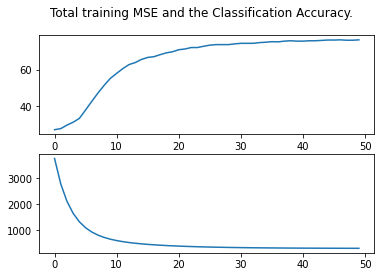

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# define the axes
x_axis = list(range(number_of_iterations))
y_axis_CA = CA_save
y_axis_MSE = MSE_save

fig, axs = plt.subplots(2)
fig.suptitle('Total training MSE and the Classification Accuracy.')
axs[0].plot(x_axis, y_axis_CA)
axs[1].plot(x_axis, y_axis_MSE)
